## Redes neuronales artificiales
+ Desarrollo del perceptrón para el reconocimiento de imágenes en 1957 fue el primer paso. 400 fotoceldas con potenciómetros ajustables durante el entrenamiento.
+ inspirados en el fucionamiento de una neurona: recepción de un impulso (señal) y una respuesta.
+ Mapeo no lineal de un valor de entrada y = f(Wx+b), fx de activación
+ funciones de activación más usadas: sigmoide, tanh y ReLU (rampa)
ReLU: rectified linear unit ReLU(x) = Max(0,x)

#### Red neuronal densa
+ multiples perceptrones, aumenta la expresividad del modelo y la salida un vector. De izq a derecha hay capa de entrada, capas ocultas y capa de salida.
+ Algunos casos de uso: clasificación y regresión
+ Entrenamiento: algoritmo de backpropagation
+ El número de perceptrones en la capa de salida dependerá de la tarea a realizar, eg en el caso de clasificación es uno por cada clase.

#### Convoluciones, kernels y filtros
+ Veremos con el caso de procesamiento de imagenes (N,M,1) o (N,M,3)
+ Operación local que busca patrones, entrega un numero y reduce dimensionalidad.
+ Etapas: multiplicación y downsampling. Downsampling es el muestreo a partir el resultado de la convolución. Maxpooling toma el máximo, meanpooling toma el mínimo, sumpooling toma la suma.
+ Luego del downsampling se aplica la función de activación para introducir complejidad en la red. Típicamente se utiliza ReLU
+ Stride: paso del kernel en número de pixeles. Un stride mas grande reduce más la dimensionalidad y evita información redundante pero tiende a simplificar más el modelo.
+ Padding: constante o reflejo en los bordes
+ Filtro: conjunto de kernels aplicados a cada canal de la imágen.


#### Red convolucional:
+ conjunto de filtros aplicados en forma secuencial
+ cada capa permite extraer información más compleja
+ Se construye un set de características usado en las capas finales.

In [23]:
import numpy as np
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [8]:
mnist_train = datasets.MNIST(root='./data', train=True, download=True,
                             transform=transforms.Compose([transforms.ToTensor()]))
mnist_test = datasets.MNIST(root='./data', train=False, download=True,
                            transform=transforms.Compose([transforms.ToTensor()]))
print(f'train: {len(mnist_train)} test: {len(mnist_test)}')

train: 60000 test: 10000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


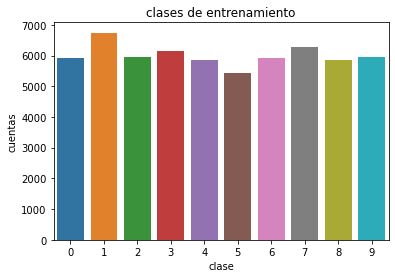

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


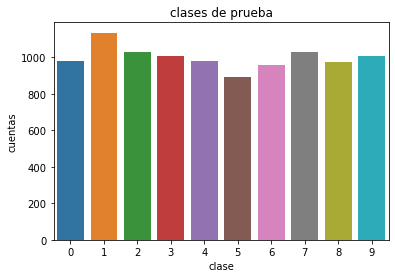

In [9]:
sns.countplot(np.array(mnist_train.targets))
plt.xlabel('clase')
plt.ylabel('cuentas')
plt.title('clases de entrenamiento')
plt.show()
sns.countplot(np.array(mnist_test.targets))
plt.xlabel('clase')
plt.ylabel('cuentas')
plt.title('clases de prueba')
plt.show()

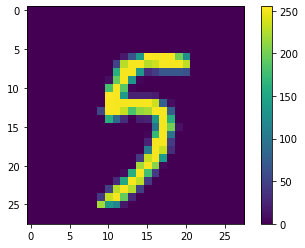

In [10]:
#IMPORTANTE, para convertir PIL a array si se desea mostrar con matplotlib
plt.imshow(mnist_train.data[420].numpy())
plt.colorbar()
#plt.imshow(np.asarray(mnist_train.data[420]))
plt.show()

In [11]:
#normalizar:
mnist_train.data = mnist_train.data/255
mnist_test.data = mnist_test.data/255

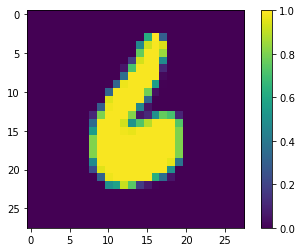

In [12]:
plt.imshow(mnist_train.data[1337].numpy())
plt.colorbar()
#plt.imshow(np.asarray(mnist_train.data[420]))
plt.show()

In [14]:
import torch.nn as nn

In [28]:
#A partir del ejemplo del notebook de clases, implementar la red secuencial con pytorch